# Final Project

## EDA on Liquor License Data
Data Source: https://data.baltimorecity.gov/datasets/liquor-licenses/explore  and https://data.baltimorecity.gov/datasets/license-one-day/explore

Data file size: First data is 6.3MB and second data is 2.6MB

The dataset explains about the liquor licenses, a governmentally issued permit to sell, manufacture, store, or otherwise use alcoholic beverages. The first dataset has 28336 rows and 20 columns. The second dataset has 12394 rows and 13 columns. Few of the columns of the dataset are LicenseClass, SubClass,LicenseDate, LicenseEndDate, LicenseYear, LicenseFee, LicenseStatus TradeName,
CorpName, Description. I have chosen this dataset as I wanted to know about the licenses in the baltimore.

The license classification describes about the type of license
- L - permit to sell only liquor
- B - to sell only beer
- W - to sell only wine
- BWL - to sell liquor, beer and wine
- AE - (arts and entertainment) beer, wine and
liquor license
- BW - to sell both beer and wine

Objectives:
- To discover which type of license is more popular
- To know which year has the highest licenses
- To know which area has the highest permits


In [1]:
#importing libraries

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import datetime

In [2]:
#importing data file

df = pd.read_csv('Liquor_Licenses.csv')
df.head()

,LLKey,CorpKey,LicenseClass,SubClass,LicenseNumber,LicenseDate,LicenseEndDate,LicenseYear,LicenseFee,CertificateNumber,LicenseStatus,LicenseeFirstName,LicenseeLastName,TradeName,CorpName,EstablishmentDesc,DayPerWeek,Description,AddrStreet,AddrZip,ESRI_OID
0,100005,201005,LBD7,BWL,171.0,2003/05/01 04:00:00+00,2004/04/30 04:00:00+00,2003,1320.0,1272,Renewed,JOSEPH O.,MYNAR,RED ROOSTER,"RED ROOSTER, INC.",Tavern,7 days,"Beer, Wine, & Liquor",6412-16 FRANKFORD AVENUE,21206,3
1,100005,201005,LBD7,BWL,171.0,2003/05/01 04:00:00+00,2004/04/30 04:00:00+00,2003,1320.0,1272,Renewed,STEPHEN,MYNAR,RED ROOSTER,"RED ROOSTER, INC.",Tavern,7 days,"Beer, Wine, & Liquor",6412-16 FRANKFORD AVENUE,21206,1
2,100016,201016,LA,BWL,89.0,2003/05/01 04:00:00+00,2004/04/30 04:00:00+00,2003,715.0,0272,Renewed,GARY S.,MOREE,BAY ISLAND SEAFOOD,"BAY ISLAND SEAFOOD CARRYOUT, INC.",Package goods only,6 days,"Beer, Wine, & Liquor",1901-05 PRATT STREET WEST,21223,2
3,100016,201016,LA,BWL,89.0,2003/05/01 04:00:00+00,2004/04/30 04:00:00+00,2003,715.0,0272,Renewed,JANICE,MOREE,BAY ISLAND SEAFOOD,"BAY ISLAND SEAFOOD CARRYOUT, INC.",Package goods only,6 days,"Beer, Wine, & Liquor",1901-05 PRATT STREET WEST,21223,4
4,100016,201016,LA,BWL,89.0,2003/05/01 04:00:00+00,2004/04/30 04:00:00+00,2003,715.0,0272,Renewed,LOREN,SHAPHES,BAY ISLAND SEAFOOD,"BAY ISLAND SEAFOOD CARRYOUT, INC.",Package goods only,6 days,"Beer, Wine, & Liquor",1901-05 PRATT STREET WEST,21223,5


In [3]:
df.shape

(28336, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28336 entries, 0 to 28335
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LLKey              28336 non-null  int64  
 1   CorpKey            28336 non-null  int64  
 2   LicenseClass       28336 non-null  object 
 3   SubClass           28336 non-null  object 
 4   LicenseNumber      28335 non-null  float64
 5   LicenseDate        28336 non-null  object 
 6   LicenseEndDate     28336 non-null  object 
 7   LicenseYear        28336 non-null  int64  
 8   LicenseFee         28336 non-null  float64
 9   CertificateNumber  28335 non-null  object 
 10  LicenseStatus      27985 non-null  object 
 11  LicenseeFirstName  28336 non-null  object 
 12  LicenseeLastName   28336 non-null  object 
 13  TradeName          28266 non-null  object 
 14  CorpName           26824 non-null  object 
 15  EstablishmentDesc  28336 non-null  object 
 16  DayPerWeek         274

### There is inconsistency in the data 
### Few columns have repeated values
### Many values do not have significant records.

#### Sanity check no1 : Checking for duplicates in the data and dropping them.

In [6]:
df[df.duplicated(subset=['LLKey'],keep=False)]

,LLKey,CorpKey,LicenseClass,SubClass,LicenseNumber,LicenseDate,LicenseEndDate,LicenseYear,LicenseFee,CertificateNumber,LicenseStatus,LicenseeFirstName,LicenseeLastName,TradeName,CorpName,EstablishmentDesc,DayPerWeek,Description,AddrStreet,AddrZip,ESRI_OID
0,100005,201005,LBD7,BWL,171.0,2003/05/01 04:00:00+00,2004/04/30 04:00:00+00,2003,1320.0,1272,Renewed,JOSEPH O.,MYNAR,RED ROOSTER,"RED ROOSTER, INC.",Tavern,7 days,"Beer, Wine, & Liquor",6412-16 FRANKFORD AVENUE,21206,3
1,100005,201005,LBD7,BWL,171.0,2003/05/01 04:00:00+00,2004/04/30 04:00:00+00,2003,1320.0,1272,Renewed,STEPHEN,MYNAR,RED ROOSTER,"RED ROOSTER, INC.",Tavern,7 days,"Beer, Wine, & Liquor",6412-16 FRANKFORD AVENUE,21206,1
2,100016,201016,LA,BWL,89.0,2003/05/01 04:00:00+00,2004/04/30 04:00:00+00,2003,715.0,0272,Renewed,GARY S.,MOREE,BAY ISLAND SEAFOOD,"BAY ISLAND SEAFOOD CARRYOUT, INC.",Package goods only,6 days,"Beer, Wine, & Liquor",1901-05 PRATT STREET WEST,21223,2
3,100016,201016,LA,BWL,89.0,2003/05/01 04:00:00+00,2004/04/30 04:00:00+00,2003,715.0,0272,Renewed,JANICE,MOREE,BAY ISLAND SEAFOOD,"BAY ISLAND SEAFOOD CARRYOUT, INC.",Package goods only,6 days,"Beer, Wine, & Liquor",1901-05 PRATT STREET WEST,21223,4
4,100016,201016,LA,BWL,89.0,2003/05/01 04:00:00+00,2004/04/30 04:00:00+00,2003,715.0,0272,Renewed,LOREN,SHAPHES,BAY ISLAND SEAFOOD,"BAY ISLAND SEAFOOD CARRYOUT, INC.",Package goods only,6 days,"Beer, Wine, & Liquor",1901-05 PRATT STREET WEST,21223,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28325,326622,201262,LBD7,BWL,407.0,2021/05/01 04:00:00+00,2022/04/30 04:00:00+00,2021,1320.0,1220,Renewed,JOHN,CHENERY,THE PORT PUBLIC HOUSE,"JR'S BAR & GRILL, INC.",Tavern,7 days,"Beer, Wine, & Liquor",1229 HULL STREET,21230,20828
28328,326625,203081,LB,BWL,316.0,2021/11/09 05:00:00+00,2022/04/30 04:00:00+00,2021,1320.0,1222,Renewed,ELLEN,LEVY,GROUNDWORK KITCHEN,"GROUNDWORK KITCHEN, LLC",Restaurant,7 days,"Beer, Wine, & Liquor",925 WASHINGTON BOULEVARD,21230,20831
28329,326625,203081,LB,BWL,316.0,2021/11/09 05:00:00+00,2022/04/30 04:00:00+00,2021,1320.0,1222,Renewed,WILLIAM,MCLENNAN,GROUNDWORK KITCHEN,"GROUNDWORK KITCHEN, LLC",Restaurant,7 days,"Beer, Wine, & Liquor",925 WASHINGTON BOULEVARD,21230,20832
28331,326627,201602,LBD7,BWL,409.0,2021/05/01 04:00:00+00,2022/04/30 04:00:00+00,2021,1320.0,1224,Renewed,MRIGENDRA,HOMAGAIN,GARDEN HUB,"KANTHA,INC",Tavern,7 days,"Beer, Wine, & Liquor",5511 BELAIR ROAD,21206,20834


In [7]:
#Dropping the repeated values

df1=df.drop_duplicates(subset=['LLKey'])
df1

,LLKey,CorpKey,LicenseClass,SubClass,LicenseNumber,LicenseDate,LicenseEndDate,LicenseYear,LicenseFee,CertificateNumber,LicenseStatus,LicenseeFirstName,LicenseeLastName,TradeName,CorpName,EstablishmentDesc,DayPerWeek,Description,AddrStreet,AddrZip,ESRI_OID
0,100005,201005,LBD7,BWL,171.0,2003/05/01 04:00:00+00,2004/04/30 04:00:00+00,2003,1320.0,1272,Renewed,JOSEPH O.,MYNAR,RED ROOSTER,"RED ROOSTER, INC.",Tavern,7 days,"Beer, Wine, & Liquor",6412-16 FRANKFORD AVENUE,21206,3
2,100016,201016,LA,BWL,89.0,2003/05/01 04:00:00+00,2004/04/30 04:00:00+00,2003,715.0,0272,Renewed,GARY S.,MOREE,BAY ISLAND SEAFOOD,"BAY ISLAND SEAFOOD CARRYOUT, INC.",Package goods only,6 days,"Beer, Wine, & Liquor",1901-05 PRATT STREET WEST,21223,2
5,100026,201026,LBD7,BWL,403.0,2003/05/01 04:00:00+00,2004/04/30 04:00:00+00,2003,1320.0,1506,Renewed,JOY,MARTIN (IND&PR),CLUB CHARLES-ZODIAC,"MARTIN & KAHOE, INC.",Tavern,7 days,"Beer, Wine, & Liquor",1724-26 CHARLES STREET NORTH,21201,6
6,100028,201028,LBD7,BWL,78.0,2003/05/01 04:00:00+00,2004/04/30 04:00:00+00,2003,1320.0,1178,Renewed,ROSEMARY,THOMPSON,CLUB ORPHEUS,"CLUB MITCHELL, INC.",Tavern,7 days,"Beer, Wine, & Liquor",1001-03 PRATT STREET EAST,21202,7
8,100034,201034,WB,BW,6.0,2003/05/01 04:00:00+00,2004/04/30 04:00:00+00,2003,165.0,0066,Renewed,BOK RYE,OH,CHARLIE & DEE CARRYOUT,NaN,Restaurant License,7 days,Beer & Light Wine,1539 BUSH STREET,21230,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28330,326626,201897,LBD7,BWL,408.0,2021/05/01 04:00:00+00,2022/04/30 04:00:00+00,2021,1320.0,1223,Renewed,ANNIE,"WINSTON, S.S.",WINSTON LOUNGE,NaN,Tavern,7 days,"Beer, Wine, & Liquor",2343 MONUMENT STREET EAST,21205,20833
28331,326627,201602,LBD7,BWL,409.0,2021/05/01 04:00:00+00,2022/04/30 04:00:00+00,2021,1320.0,1224,Renewed,MRIGENDRA,HOMAGAIN,GARDEN HUB,"KANTHA,INC",Tavern,7 days,"Beer, Wine, & Liquor",5511 BELAIR ROAD,21206,20834
28333,326630,201569,LA,BWL,189.0,2020/05/01 04:00:00+00,2021/04/30 04:00:00+00,2020,858.0,1196,Renewed,ALEXANDER,WOLDE,MIDTOWN LIQUOR STORE,"A & D, LLC",Package goods only,6 days,"Beer, Wine, & Liquor",17 BIDDLE STREET WEST,21201,20836
28334,326631,201569,LA,BWL,179.0,2021/05/01 04:00:00+00,2022/04/30 04:00:00+00,2021,858.0,1227,Renewed,ALEXANDER,WOLDE,MIDTOWN LIQUOR STORE,"A & D, LLC",Package goods only,6 days,"Beer, Wine, & Liquor",17 BIDDLE STREET WEST,21201,20837


##### Duplicate values are dropped and the values are stored.



#### Sanity check no2: As the datatypes were object and changed to the datetime





In [ ]:
#Converting all the date columns to the date 

df1['LicenseDate'] = df1['LicenseDate'].apply(pd.to_datetime) 
df1['LicenseDate']= df1['LicenseDate'].dt.date

In [ ]:
df1['LicenseEndDate']=pd.to_datetime(df1.LicenseEndDate)
df1['LicenseEndDate'] = df1['LicenseEndDate'].dt.date

In [ ]:
#Changing the data type 

df1['LicenseDate'] = df1['LicenseDate'].apply(pd.to_datetime)
df1['LicenseEndDate'] = df1['LicenseEndDate'].apply(pd.to_datetime) 


In [11]:
#Checking data types

df1.dtypes

LLKey                         int64
CorpKey                       int64
LicenseClass                 object
SubClass                     object
LicenseNumber               float64
LicenseDate          datetime64[ns]
LicenseEndDate       datetime64[ns]
LicenseYear                   int64
LicenseFee                  float64
CertificateNumber            object
LicenseStatus                object
LicenseeFirstName            object
LicenseeLastName             object
TradeName                    object
CorpName                     object
EstablishmentDesc            object
DayPerWeek                   object
Description                  object
AddrStreet                   object
AddrZip                       int64
ESRI_OID                      int64
dtype: object

##### Datatypes have been changed significantly and the columns having date values also changed to date format.

### Data Cleaning

#### Sanity check no3: Handling null values and removing unwanted columns



In [12]:
#Knowing how many null values are there in the dataframe

df1.isnull().sum()

LLKey                   0
CorpKey                 0
LicenseClass            0
SubClass                0
LicenseNumber           1
LicenseDate             0
LicenseEndDate          0
LicenseYear             0
LicenseFee              0
CertificateNumber       1
LicenseStatus         215
LicenseeFirstName       0
LicenseeLastName        0
TradeName              60
CorpName             1153
EstablishmentDesc       0
DayPerWeek            426
Description           348
AddrStreet              0
AddrZip                 0
ESRI_OID                0
dtype: int64

In [13]:
#Dropping unwanted columns

a= df1.drop(['EstablishmentDesc','DayPerWeek','ESRI_OID','LicenseeFirstName','LicenseeLastName','CorpKey','LicenseNumber'],axis=1)
a

,LLKey,LicenseClass,SubClass,LicenseDate,LicenseEndDate,LicenseYear,LicenseFee,CertificateNumber,LicenseStatus,TradeName,CorpName,Description,AddrStreet,AddrZip
0,100005,LBD7,BWL,2003-05-01,2004-04-30,2003,1320.0,1272,Renewed,RED ROOSTER,"RED ROOSTER, INC.","Beer, Wine, & Liquor",6412-16 FRANKFORD AVENUE,21206
2,100016,LA,BWL,2003-05-01,2004-04-30,2003,715.0,0272,Renewed,BAY ISLAND SEAFOOD,"BAY ISLAND SEAFOOD CARRYOUT, INC.","Beer, Wine, & Liquor",1901-05 PRATT STREET WEST,21223
5,100026,LBD7,BWL,2003-05-01,2004-04-30,2003,1320.0,1506,Renewed,CLUB CHARLES-ZODIAC,"MARTIN & KAHOE, INC.","Beer, Wine, & Liquor",1724-26 CHARLES STREET NORTH,21201
6,100028,LBD7,BWL,2003-05-01,2004-04-30,2003,1320.0,1178,Renewed,CLUB ORPHEUS,"CLUB MITCHELL, INC.","Beer, Wine, & Liquor",1001-03 PRATT STREET EAST,21202
8,100034,WB,BW,2003-05-01,2004-04-30,2003,165.0,0066,Renewed,CHARLIE & DEE CARRYOUT,NaN,Beer & Light Wine,1539 BUSH STREET,21230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28330,326626,LBD7,BWL,2021-05-01,2022-04-30,2021,1320.0,1223,Renewed,WINSTON LOUNGE,NaN,"Beer, Wine, & Liquor",2343 MONUMENT STREET EAST,21205
28331,326627,LBD7,BWL,2021-05-01,2022-04-30,2021,1320.0,1224,Renewed,GARDEN HUB,"KANTHA,INC","Beer, Wine, & Liquor",5511 BELAIR ROAD,21206
28333,326630,LA,BWL,2020-05-01,2021-04-30,2020,858.0,1196,Renewed,MIDTOWN LIQUOR STORE,"A & D, LLC","Beer, Wine, & Liquor",17 BIDDLE STREET WEST,21201
28334,326631,LA,BWL,2021-05-01,2022-04-30,2021,858.0,1227,Renewed,MIDTOWN LIQUOR STORE,"A & D, LLC","Beer, Wine, & Liquor",17 BIDDLE STREET WEST,21201


In [14]:
#Removing the specific row which has null values

data=a.drop([699],axis=0)
data

,LLKey,LicenseClass,SubClass,LicenseDate,LicenseEndDate,LicenseYear,LicenseFee,CertificateNumber,LicenseStatus,TradeName,CorpName,Description,AddrStreet,AddrZip
0,100005,LBD7,BWL,2003-05-01,2004-04-30,2003,1320.0,1272,Renewed,RED ROOSTER,"RED ROOSTER, INC.","Beer, Wine, & Liquor",6412-16 FRANKFORD AVENUE,21206
2,100016,LA,BWL,2003-05-01,2004-04-30,2003,715.0,0272,Renewed,BAY ISLAND SEAFOOD,"BAY ISLAND SEAFOOD CARRYOUT, INC.","Beer, Wine, & Liquor",1901-05 PRATT STREET WEST,21223
5,100026,LBD7,BWL,2003-05-01,2004-04-30,2003,1320.0,1506,Renewed,CLUB CHARLES-ZODIAC,"MARTIN & KAHOE, INC.","Beer, Wine, & Liquor",1724-26 CHARLES STREET NORTH,21201
6,100028,LBD7,BWL,2003-05-01,2004-04-30,2003,1320.0,1178,Renewed,CLUB ORPHEUS,"CLUB MITCHELL, INC.","Beer, Wine, & Liquor",1001-03 PRATT STREET EAST,21202
8,100034,WB,BW,2003-05-01,2004-04-30,2003,165.0,0066,Renewed,CHARLIE & DEE CARRYOUT,NaN,Beer & Light Wine,1539 BUSH STREET,21230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28330,326626,LBD7,BWL,2021-05-01,2022-04-30,2021,1320.0,1223,Renewed,WINSTON LOUNGE,NaN,"Beer, Wine, & Liquor",2343 MONUMENT STREET EAST,21205
28331,326627,LBD7,BWL,2021-05-01,2022-04-30,2021,1320.0,1224,Renewed,GARDEN HUB,"KANTHA,INC","Beer, Wine, & Liquor",5511 BELAIR ROAD,21206
28333,326630,LA,BWL,2020-05-01,2021-04-30,2020,858.0,1196,Renewed,MIDTOWN LIQUOR STORE,"A & D, LLC","Beer, Wine, & Liquor",17 BIDDLE STREET WEST,21201
28334,326631,LA,BWL,2021-05-01,2022-04-30,2021,858.0,1227,Renewed,MIDTOWN LIQUOR STORE,"A & D, LLC","Beer, Wine, & Liquor",17 BIDDLE STREET WEST,21201


##### Cleaned the data by removing unwanted values and columns.

In [15]:
#Clearing the null values by filling the values

data['Description'].fillna('Beer, Wine, & Liquor',inplace=True)
data['LicenseStatus'].fillna('Not known',inplace = True) 
data['CorpName'].fillna('Other',inplace = True)
data['TradeName'].fillna('Unknown',inplace=True)

##### The columns which are needed are filled with appropriate values 

In [16]:
data.isnull().sum()

LLKey                0
LicenseClass         0
SubClass             0
LicenseDate          0
LicenseEndDate       0
LicenseYear          0
LicenseFee           0
CertificateNumber    0
LicenseStatus        0
TradeName            0
CorpName             0
Description          0
AddrStreet           0
AddrZip              0
dtype: int64

In [17]:
#Reading another data file

dff = pd.read_csv('License_One_Day.csv')
dff

,LLKey,IssueDate,StartDate,EndDate,CertificateNumber,Fee,NPOName,Event,LicenseClass,SubClass,Description,AddrStreet,AddrZip,Location
0,300001,1999/04/30 04:00:00+00,1999/05/08 04:00:00+00,1999/05/09 04:00:00+00,5682,25,SELT'S SOCIAL CLUB,STEELWORKERS UNION HALL LOCAL #2610,LS,BWL,"Beer, Wine, & Liquor",550 DUNDALK AVE,21224,550 DUNDALK AVE 21224
1,300002,2000/02/14 05:00:00+00,2000/03/11 05:00:00+00,2000/03/12 05:00:00+00,6122,25,MARYLAND ART PLACE/ 14 KT CABARET,MARYLAND ART PLACE,WS,BW,Beer & Wines,218 W. SARATOGA ST.,21201,218 W. SARATOGA ST. 21201
2,300003,2000/05/12 04:00:00+00,2000/05/17 04:00:00+00,2000/05/18 04:00:00+00,6283,25,"MARYLAND ART PLACE, INC./14K CABARET",MARYLAND ART PLACE,WS,BW,Beer & Wines,218 W SARATOGA ST,21201,218 W SARATOGA ST 21201
3,300004,2002/06/04 04:00:00+00,2002/06/11 04:00:00+00,2002/06/16 04:00:00+00,356,125,OUR LADY OF POMPEI CHURCH,OUR LADY OF POMPEI SCHOOL FIELD,WS,BW,Beer & Wines,CLAREMONT & GRUNDY,21224,CLAREMONT & GRUNDY 21224
4,300005,1996/02/27 05:00:00+00,1996/03/09 05:00:00+00,1996/03/10 05:00:00+00,3655,25,OUR LADY OF POMPEI CHURCH,SCHOOL GYMNASIUM,WS,BW,Beer & Wines,201 S. CONKLING STREET,21224,201 S. CONKLING STREET 21224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12389,409992,2021/11/23 05:00:00+00,2021/11/22 05:00:00+00,2021/11/24 05:00:00+00,66698,100,"WATERFRONT PARTNERSHIP OF BALTIMORE, INC.",Christmas Village,LS,BWL,"Beer, Wine, & Liquor",410 Light St. (West Shore Park),21202,410 Light St. (West Shore Park) 21202
12390,409993,2021/11/23 05:00:00+00,2021/11/26 05:00:00+00,2021/11/29 05:00:00+00,66699,150,"Waterfront Partnership of Baltimore, Inc.",Christmas Village,LS,BWL,"Beer, Wine, & Liquor",410 Light St.(West Shore Park),21202,410 Light St.(West Shore Park) 21202
12391,409994,2021/11/23 05:00:00+00,2021/12/01 05:00:00+00,2021/12/06 05:00:00+00,66700,250,"Waterfront Partnership of Baltimore, Inc.",Christmas Village,LS,BWL,"Beer, Wine, & Liquor",410 Light St.(West Shore Park),21202,410 Light St.(West Shore Park) 21202
12392,409995,2021/11/27 05:00:00+00,2021/12/08 05:00:00+00,2021/12/13 05:00:00+00,66701,250,"Waterfront Partnership of Baltimore, Inc.",Christmas Village,LS,BWL,"Beer, Wine, & Liquor",401 Light St. (West Shore Park),21202,401 Light St. (West Shore Park) 21202


In [18]:
#Changing the columns names 

dff.rename(columns={'StartDate': 'LicenseDate','EndDate': 'LicenseEndDate','Fee':'LicenseFee'},inplace=True)
dff

,LLKey,IssueDate,LicenseDate,LicenseEndDate,CertificateNumber,LicenseFee,NPOName,Event,LicenseClass,SubClass,Description,AddrStreet,AddrZip,Location
0,300001,1999/04/30 04:00:00+00,1999/05/08 04:00:00+00,1999/05/09 04:00:00+00,5682,25,SELT'S SOCIAL CLUB,STEELWORKERS UNION HALL LOCAL #2610,LS,BWL,"Beer, Wine, & Liquor",550 DUNDALK AVE,21224,550 DUNDALK AVE 21224
1,300002,2000/02/14 05:00:00+00,2000/03/11 05:00:00+00,2000/03/12 05:00:00+00,6122,25,MARYLAND ART PLACE/ 14 KT CABARET,MARYLAND ART PLACE,WS,BW,Beer & Wines,218 W. SARATOGA ST.,21201,218 W. SARATOGA ST. 21201
2,300003,2000/05/12 04:00:00+00,2000/05/17 04:00:00+00,2000/05/18 04:00:00+00,6283,25,"MARYLAND ART PLACE, INC./14K CABARET",MARYLAND ART PLACE,WS,BW,Beer & Wines,218 W SARATOGA ST,21201,218 W SARATOGA ST 21201
3,300004,2002/06/04 04:00:00+00,2002/06/11 04:00:00+00,2002/06/16 04:00:00+00,356,125,OUR LADY OF POMPEI CHURCH,OUR LADY OF POMPEI SCHOOL FIELD,WS,BW,Beer & Wines,CLAREMONT & GRUNDY,21224,CLAREMONT & GRUNDY 21224
4,300005,1996/02/27 05:00:00+00,1996/03/09 05:00:00+00,1996/03/10 05:00:00+00,3655,25,OUR LADY OF POMPEI CHURCH,SCHOOL GYMNASIUM,WS,BW,Beer & Wines,201 S. CONKLING STREET,21224,201 S. CONKLING STREET 21224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12389,409992,2021/11/23 05:00:00+00,2021/11/22 05:00:00+00,2021/11/24 05:00:00+00,66698,100,"WATERFRONT PARTNERSHIP OF BALTIMORE, INC.",Christmas Village,LS,BWL,"Beer, Wine, & Liquor",410 Light St. (West Shore Park),21202,410 Light St. (West Shore Park) 21202
12390,409993,2021/11/23 05:00:00+00,2021/11/26 05:00:00+00,2021/11/29 05:00:00+00,66699,150,"Waterfront Partnership of Baltimore, Inc.",Christmas Village,LS,BWL,"Beer, Wine, & Liquor",410 Light St.(West Shore Park),21202,410 Light St.(West Shore Park) 21202
12391,409994,2021/11/23 05:00:00+00,2021/12/01 05:00:00+00,2021/12/06 05:00:00+00,66700,250,"Waterfront Partnership of Baltimore, Inc.",Christmas Village,LS,BWL,"Beer, Wine, & Liquor",410 Light St.(West Shore Park),21202,410 Light St.(West Shore Park) 21202
12392,409995,2021/11/27 05:00:00+00,2021/12/08 05:00:00+00,2021/12/13 05:00:00+00,66701,250,"Waterfront Partnership of Baltimore, Inc.",Christmas Village,LS,BWL,"Beer, Wine, & Liquor",401 Light St. (West Shore Park),21202,401 Light St. (West Shore Park) 21202


#### Sanity check no4: Handling null values

In [19]:
dff.isnull().sum()

LLKey                  0
IssueDate              0
LicenseDate            0
LicenseEndDate         0
CertificateNumber      0
LicenseFee             0
NPOName                0
Event                  8
LicenseClass           0
SubClass               0
Description            0
AddrStreet             0
AddrZip               10
Location             517
dtype: int64

In [20]:
#removing the null values in the column address zip

dff=dff.dropna(subset=['AddrZip'])

In [21]:
dff.shape

(12384, 14)

In [ ]:
#Replacing the errors with the correct values

dff['AddrZip'].replace('2`201','21230',inplace=True)
dff['AddrZip'].replace('JEROM','21202',inplace=True)

##### Cleaned the data in the second dataset of a particular column by removing the null values and filling the values.



#### Sanity check no5: Changing the data types of the date values

In [ ]:
#Changing the data type 

dff['AddrZip']=pd.to_numeric(dff['AddrZip'])

In [ ]:
#Changing the data columns to date 

dff['IssueDate'] = pd.to_datetime(dff.IssueDate)
dff['IssueDate']= dff['IssueDate'].dt.date

In [ ]:
dff['LicenseDate'] = pd.to_datetime(dff.LicenseDate)
dff['LicenseDate']= dff['LicenseDate'].dt.date

In [ ]:
dff['LicenseEndDate'] = pd.to_datetime(dff.LicenseEndDate,errors='coerce')
dff['LicenseEndDate']= dff['LicenseEndDate'].dt.date

In [ ]:
#Changing the data types

dff['IssueDate'] = dff['IssueDate'].apply(pd.to_datetime)
dff['LicenseDate'] = dff['LicenseDate'].apply(pd.to_datetime)
dff['LicenseEndDate'] = dff['LicenseEndDate'].apply(pd.to_datetime)

In [46]:
dff.dtypes

LLKey                         int64
IssueDate            datetime64[ns]
LicenseDate          datetime64[ns]
LicenseEndDate       datetime64[ns]
CertificateNumber            object
LicenseFee                    int64
NPOName                      object
Event                        object
LicenseClass                 object
SubClass                     object
Description                  object
AddrStreet                   object
AddrZip                       int64
Location                     object
LicenseYear                   int64
dtype: object

##### Changed the datatypes with are relevant to the values.

In [47]:
#Filtering the year from the date

dff['LicenseYear'] = pd.DatetimeIndex(dff['LicenseDate']).year
dff

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,LLKey,IssueDate,LicenseDate,LicenseEndDate,CertificateNumber,LicenseFee,NPOName,Event,LicenseClass,SubClass,Description,AddrStreet,AddrZip,Location,LicenseYear
0,300001,1999-04-30,1999-05-08,1999-05-09,5682,25,SELT'S SOCIAL CLUB,STEELWORKERS UNION HALL LOCAL #2610,LS,BWL,"Beer, Wine, & Liquor",550 DUNDALK AVE,21224,550 DUNDALK AVE 21224,1999
1,300002,2000-02-14,2000-03-11,2000-03-12,6122,25,MARYLAND ART PLACE/ 14 KT CABARET,MARYLAND ART PLACE,WS,BW,Beer & Wines,218 W. SARATOGA ST.,21201,218 W. SARATOGA ST. 21201,2000
2,300003,2000-05-12,2000-05-17,2000-05-18,6283,25,"MARYLAND ART PLACE, INC./14K CABARET",MARYLAND ART PLACE,WS,BW,Beer & Wines,218 W SARATOGA ST,21201,218 W SARATOGA ST 21201,2000
3,300004,2002-06-04,2002-06-11,2002-06-16,356,125,OUR LADY OF POMPEI CHURCH,OUR LADY OF POMPEI SCHOOL FIELD,WS,BW,Beer & Wines,CLAREMONT & GRUNDY,21224,CLAREMONT & GRUNDY 21224,2002
4,300005,1996-02-27,1996-03-09,1996-03-10,3655,25,OUR LADY OF POMPEI CHURCH,SCHOOL GYMNASIUM,WS,BW,Beer & Wines,201 S. CONKLING STREET,21224,201 S. CONKLING STREET 21224,1996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12389,409992,2021-11-23,2021-11-22,2021-11-24,66698,100,"WATERFRONT PARTNERSHIP OF BALTIMORE, INC.",Christmas Village,LS,BWL,"Beer, Wine, & Liquor",410 Light St. (West Shore Park),21202,410 Light St. (West Shore Park) 21202,2021
12390,409993,2021-11-23,2021-11-26,2021-11-29,66699,150,"Waterfront Partnership of Baltimore, Inc.",Christmas Village,LS,BWL,"Beer, Wine, & Liquor",410 Light St.(West Shore Park),21202,410 Light St.(West Shore Park) 21202,2021
12391,409994,2021-11-23,2021-12-01,2021-12-06,66700,250,"Waterfront Partnership of Baltimore, Inc.",Christmas Village,LS,BWL,"Beer, Wine, & Liquor",410 Light St.(West Shore Park),21202,410 Light St.(West Shore Park) 21202,2021
12392,409995,2021-11-27,2021-12-08,2021-12-13,66701,250,"Waterfront Partnership of Baltimore, Inc.",Christmas Village,LS,BWL,"Beer, Wine, & Liquor",401 Light St. (West Shore Park),21202,401 Light St. (West Shore Park) 21202,2021


#### Data cleaning

In [30]:
#Deleting the unwanted columns from the dataframe

b= dff.drop(['IssueDate','NPOName','Event','Location',],axis=1)
b

,LLKey,LicenseDate,LicenseEndDate,CertificateNumber,LicenseFee,LicenseClass,SubClass,Description,AddrStreet,AddrZip,LicenseYear
0,300001,1999-05-08,1999-05-09,5682,25,LS,BWL,"Beer, Wine, & Liquor",550 DUNDALK AVE,21224,1999
1,300002,2000-03-11,2000-03-12,6122,25,WS,BW,Beer & Wines,218 W. SARATOGA ST.,21201,2000
2,300003,2000-05-17,2000-05-18,6283,25,WS,BW,Beer & Wines,218 W SARATOGA ST,21201,2000
3,300004,2002-06-11,2002-06-16,356,125,WS,BW,Beer & Wines,CLAREMONT & GRUNDY,21224,2002
4,300005,1996-03-09,1996-03-10,3655,25,WS,BW,Beer & Wines,201 S. CONKLING STREET,21224,1996
...,...,...,...,...,...,...,...,...,...,...,...
12389,409992,2021-11-22,2021-11-24,66698,100,LS,BWL,"Beer, Wine, & Liquor",410 Light St. (West Shore Park),21202,2021
12390,409993,2021-11-26,2021-11-29,66699,150,LS,BWL,"Beer, Wine, & Liquor",410 Light St.(West Shore Park),21202,2021
12391,409994,2021-12-01,2021-12-06,66700,250,LS,BWL,"Beer, Wine, & Liquor",410 Light St.(West Shore Park),21202,2021
12392,409995,2021-12-08,2021-12-13,66701,250,LS,BWL,"Beer, Wine, & Liquor",401 Light St. (West Shore Park),21202,2021


In [31]:
b[b['LicenseEndDate'].isnull()]

,LLKey,LicenseDate,LicenseEndDate,CertificateNumber,LicenseFee,LicenseClass,SubClass,Description,AddrStreet,AddrZip,LicenseYear
7929,405532,2013-05-26,NaT,62239,12782200,LS,BWL,"Beer, Wine, & Liquor",3301 ANNAPOLIS ROAD,21225,2013


In [32]:
#Removing the specific row which doesn't contain useful values

data1=b.drop([7929],axis=0)
data1

,LLKey,LicenseDate,LicenseEndDate,CertificateNumber,LicenseFee,LicenseClass,SubClass,Description,AddrStreet,AddrZip,LicenseYear
0,300001,1999-05-08,1999-05-09,5682,25,LS,BWL,"Beer, Wine, & Liquor",550 DUNDALK AVE,21224,1999
1,300002,2000-03-11,2000-03-12,6122,25,WS,BW,Beer & Wines,218 W. SARATOGA ST.,21201,2000
2,300003,2000-05-17,2000-05-18,6283,25,WS,BW,Beer & Wines,218 W SARATOGA ST,21201,2000
3,300004,2002-06-11,2002-06-16,356,125,WS,BW,Beer & Wines,CLAREMONT & GRUNDY,21224,2002
4,300005,1996-03-09,1996-03-10,3655,25,WS,BW,Beer & Wines,201 S. CONKLING STREET,21224,1996
...,...,...,...,...,...,...,...,...,...,...,...
12389,409992,2021-11-22,2021-11-24,66698,100,LS,BWL,"Beer, Wine, & Liquor",410 Light St. (West Shore Park),21202,2021
12390,409993,2021-11-26,2021-11-29,66699,150,LS,BWL,"Beer, Wine, & Liquor",410 Light St.(West Shore Park),21202,2021
12391,409994,2021-12-01,2021-12-06,66700,250,LS,BWL,"Beer, Wine, & Liquor",410 Light St.(West Shore Park),21202,2021
12392,409995,2021-12-08,2021-12-13,66701,250,LS,BWL,"Beer, Wine, & Liquor",401 Light St. (West Shore Park),21202,2021


##### Cleaned the data by deleting unwanted columns and null values.

In [33]:
#Getting the similar columns from the both dataframes

data.columns & data1.columns

Index(['LLKey', 'LicenseClass', 'SubClass', 'LicenseDate', 'LicenseEndDate',
       'LicenseYear', 'LicenseFee', 'CertificateNumber', 'Description',
       'AddrStreet', 'AddrZip'],
      dtype='object')

In [34]:
#Merging the both dataframes using joins

m= pd.merge(left=data, right=data1, how='outer',on=['LLKey', 'LicenseClass', 'SubClass', 'LicenseDate', 'LicenseEndDate',
       'LicenseYear', 'LicenseFee', 'CertificateNumber', 'Description',
       'AddrStreet', 'AddrZip'])
m

/usr/local/lib/python3.7/dist-packages/pandas/core/reshape/merge.py:1117: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  UserWarning,


,LLKey,LicenseClass,SubClass,LicenseDate,LicenseEndDate,LicenseYear,LicenseFee,CertificateNumber,LicenseStatus,TradeName,CorpName,Description,AddrStreet,AddrZip
0,100005,LBD7,BWL,2003-05-01,2004-04-30,2003,1320.0,1272,Renewed,RED ROOSTER,"RED ROOSTER, INC.","Beer, Wine, & Liquor",6412-16 FRANKFORD AVENUE,21206
1,100016,LA,BWL,2003-05-01,2004-04-30,2003,715.0,0272,Renewed,BAY ISLAND SEAFOOD,"BAY ISLAND SEAFOOD CARRYOUT, INC.","Beer, Wine, & Liquor",1901-05 PRATT STREET WEST,21223
2,100026,LBD7,BWL,2003-05-01,2004-04-30,2003,1320.0,1506,Renewed,CLUB CHARLES-ZODIAC,"MARTIN & KAHOE, INC.","Beer, Wine, & Liquor",1724-26 CHARLES STREET NORTH,21201
3,100028,LBD7,BWL,2003-05-01,2004-04-30,2003,1320.0,1178,Renewed,CLUB ORPHEUS,"CLUB MITCHELL, INC.","Beer, Wine, & Liquor",1001-03 PRATT STREET EAST,21202
4,100034,WB,BW,2003-05-01,2004-04-30,2003,165.0,0066,Renewed,CHARLIE & DEE CARRYOUT,Other,Beer & Light Wine,1539 BUSH STREET,21230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27533,409992,LS,BWL,2021-11-22,2021-11-24,2021,100.0,66698,NaN,NaN,NaN,"Beer, Wine, & Liquor",410 Light St. (West Shore Park),21202
27534,409993,LS,BWL,2021-11-26,2021-11-29,2021,150.0,66699,NaN,NaN,NaN,"Beer, Wine, & Liquor",410 Light St.(West Shore Park),21202
27535,409994,LS,BWL,2021-12-01,2021-12-06,2021,250.0,66700,NaN,NaN,NaN,"Beer, Wine, & Liquor",410 Light St.(West Shore Park),21202
27536,409995,LS,BWL,2021-12-08,2021-12-13,2021,250.0,66701,NaN,NaN,NaN,"Beer, Wine, & Liquor",401 Light St. (West Shore Park),21202


##### Merged the two data sets using joins is done.

In [35]:
#Checking null values

m.isnull().sum()

LLKey                    0
LicenseClass             0
SubClass                 0
LicenseDate              0
LicenseEndDate           0
LicenseYear              0
LicenseFee               0
CertificateNumber        0
LicenseStatus        12383
TradeName            12383
CorpName             12383
Description              0
AddrStreet               0
AddrZip                  0
dtype: int64

In [36]:
#Replacing the null values

m['LicenseStatus'].fillna('Not known',inplace = True) 
m['CorpName'].fillna('Other',inplace = True)
m['TradeName'].fillna('Unknown',inplace=True)

##### Data is cleaned by filling out the values relevantly.

In [37]:
m.isnull().sum()

LLKey                0
LicenseClass         0
SubClass             0
LicenseDate          0
LicenseEndDate       0
LicenseYear          0
LicenseFee           0
CertificateNumber    0
LicenseStatus        0
TradeName            0
CorpName             0
Description          0
AddrStreet           0
AddrZip              0
dtype: int64

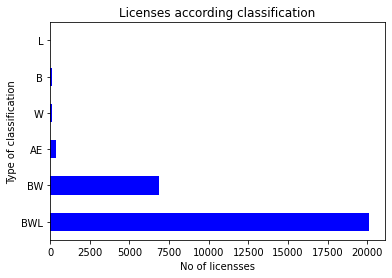

In [38]:
#Plotting the License classification

m.SubClass.value_counts().sort_values(ascending=False).plot(kind= 'barh',color='blue',title='Licenses according classification')
plt.xlabel("No of licensses")
plt.ylabel("Type of classification")
plt.show() 

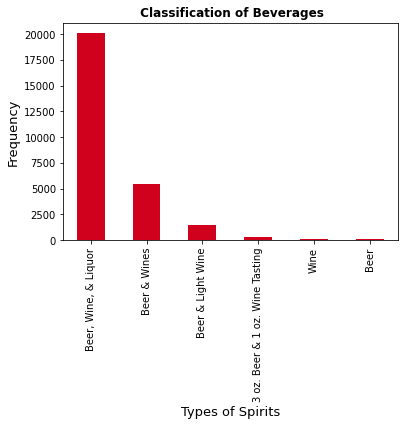

In [39]:
#Plotting the types of beverages

m['Description'].value_counts()[:6].plot(kind='bar',color='#CF011D')
plt.title(" Classification of Beverages",fontweight="bold")
plt.xlabel('Types of Spirits',fontsize=13)
plt.ylabel('Frequency',fontsize=13)
plt.show()

In [40]:
m['LicenseFee'].replace(-9100.0,9100.0,inplace=True)
m['LicenseFee'].replace(-225.0,225.0,inplace=True)
m['LicenseFee'].replace(-750.0,750.0,inplace=True)

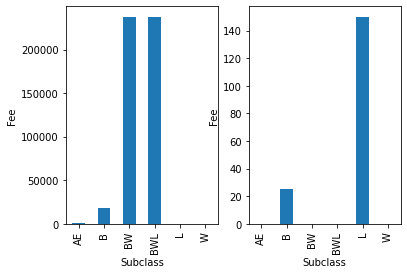

In [41]:
plt.subplot(1,2,1)
uni = m.groupby('SubClass')['LicenseFee'].max()
uni.plot(kind='bar')
plt.xlabel('Subclass')
plt.ylabel('Fee')


plt.subplot(1,2,2)
uni = m.groupby('SubClass')['LicenseFee'].min()
uni.plot(kind='bar')
plt.xlabel('Subclass')
plt.ylabel('Fee')

plt.show()

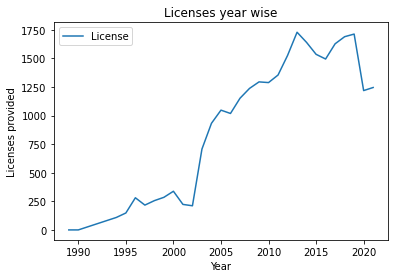

In [42]:
#Plotting the highest licenses according to the year

licenseyear = m.groupby(m['LicenseYear']).size().plot(kind='line',title='Licenses year wise')
plt.xlabel("Year")
plt.ylabel("Licenses provided")
plt.legend(['License'])
plt.show(licenseyear)

In [43]:
#Replacing the incorrect values with correct inputs

m['AddrZip'].replace(212,21230,inplace=True)
m['AddrZip'].replace(21,21201,inplace=True)
m['AddrZip'].replace(2127,21207,inplace=True)
m['AddrZip'].replace(2122,21223,inplace=True)
m['AddrZip'].replace(2124,21224,inplace=True)
m['AddrZip'].replace(2130,21230,inplace=True)
m['AddrZip'].replace(2202,21201,inplace=True)
m['AddrZip'].replace(2231,21231,inplace=True)

In [44]:
#Counting the number of licenses according to Zipcode

Zip = m.groupby('AddrZip').size().sort_values(ascending = False)
Zip

AddrZip
21201    3749
21202    3621
21224    2898
21230    2816
21231    2007
21218    1861
21211    1221
21223    1177
21215    1140
21217    1099
21213     843
21212     794
21210     653
21205     518
21206     414
21214     398
21216     381
21225     371
21229     317
21226     306
21209     208
21234     169
21222     110
21239      96
21207      86
21227      82
21251      80
21044      49
21237      17
21204       7
21221       6
21208       6
21203       5
21236       5
21281       4
21220       3
21136       2
24234       2
21228       2
21270       2
21619       2
22123       1
21233       1
21244       1
21287       1
21128       1
21117       1
21048       1
21010       1
20202       1
20148       1
0           1
dtype: int64

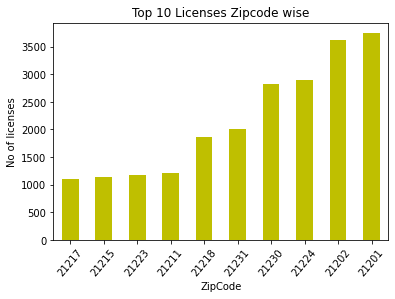

In [45]:
#Plotting the graph of top 10 no of licenses Zipcode wise

Zip.sort_values(ascending=False).head(10).sort_values().plot(kind='bar',title='Top 10 Licenses Zipcode wise',color='y')
plt.xticks(rotation=50)
plt.xlabel("ZipCode")
plt.ylabel("No of licenses")
plt.show()

### Summary
- Beer,Wine and Liquor has more permits of licenses in Baltimore.
- Beer has the lowest permits among the other beverages.
- The license fee for the permits is high for beer, wine and liquor and beer wine.
- The license fee is minimum for beer and liquor. And rest of the classifications have zero values as they are for one day license.
- The permits have increased from the year 2003.
- The highest licenses are in the Baltimore City 21201.
 
 **Insights from the analysis**
- While cleaning data there were many duplicate values in many types and got rid of them.
- The data was inconsitent and using the dependent variables got the data filled.
- Replaced the values which are not consistent.
- Changed the data types which are not relatable to the values.



